In [1]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import *

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

In [2]:
df_train = pd.read_csv("../datasets/train_processed.csv", index_col=0)
df_new = df_train.drop(["Next_Tmin", "Next_Tmax"], axis=1)

df_val = pd.read_csv("../datasets/val_processed.csv", index_col=0)
df_val_save = df_val.drop(["Next_Tmin", "Next_Tmax"], axis=1)

df_test = pd.read_csv("../datasets/test_processed.csv", index_col=0)
df_test_save = df_test.drop(["Next_Tmin", "Next_Tmax"], axis=1)

df_train

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC2,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lon,Slope,Solar radiation,Next_Tmin,Next_Tmax
2798,24.0,25.3,53.098980,88.314713,28.838707,22.714764,4.491992,35.357061,0.397159,0.536422,0.217628,0.000000,0.000000,0.000000,126.909,0.2223,4849.283203,22.9,28.9
1429,5.0,30.0,57.957870,88.353050,28.629040,22.664603,5.869879,89.331824,0.218586,0.001589,0.000000,0.000000,0.007546,0.000000,127.135,0.5055,4563.660156,21.5,31.4
4835,11.0,32.6,37.920181,77.275185,33.550047,24.529717,6.451454,71.790871,0.015765,0.278280,0.000000,0.000000,0.000000,0.000000,127.085,0.6233,5795.268066,22.2,33.6
5434,10.0,30.0,66.996681,95.048515,26.293850,23.365634,4.801002,34.452793,0.790333,0.787790,4.833832,2.626041,0.000000,0.029888,126.955,5.1782,5352.822754,22.2,31.1
7260,11.0,31.3,54.651810,80.519485,28.943090,24.040451,6.525222,49.586287,0.356729,0.679298,0.000000,0.000000,0.000000,0.000000,127.085,0.6233,5102.056152,23.8,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,6.0,33.5,49.282288,84.976288,34.561699,26.705811,5.534268,81.235738,0.229199,0.464349,0.000000,0.000000,0.000000,12.055163,127.042,0.1457,5404.668457,26.7,33.4
5723,24.0,34.8,46.886745,84.179184,34.680169,28.586751,6.206956,57.148986,0.013230,0.010946,0.000000,0.000000,0.000000,0.000000,126.909,0.2223,5047.767578,27.7,35.6
5264,15.0,31.8,51.766171,82.884941,32.157013,27.149286,8.539820,32.274478,0.126622,0.101377,0.006876,0.000000,0.000000,0.000000,126.937,0.8552,5538.563477,25.1,32.1
2835,11.0,24.7,57.398273,93.838325,28.527854,22.080858,6.573750,38.056711,0.278724,0.151631,0.005907,0.000000,0.000000,0.000000,127.085,0.6233,4804.658203,20.6,29.4


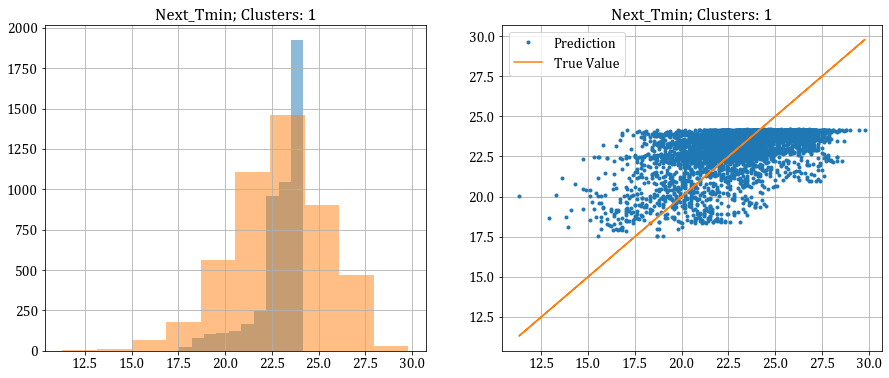

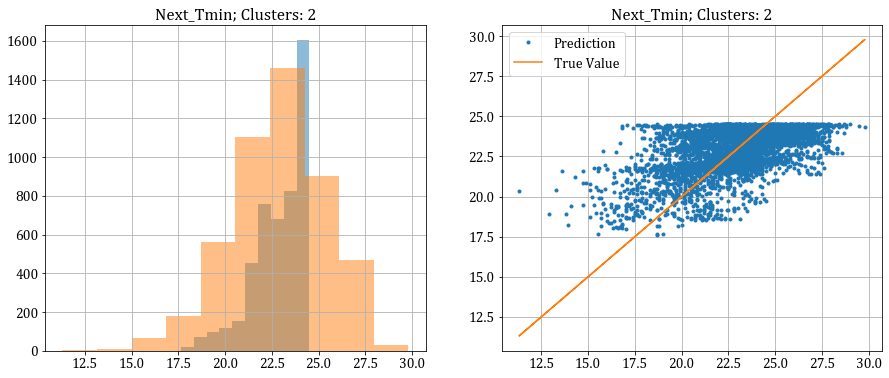

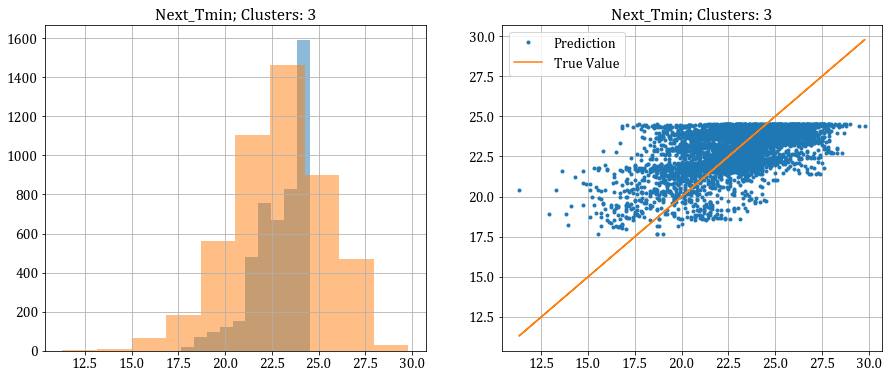

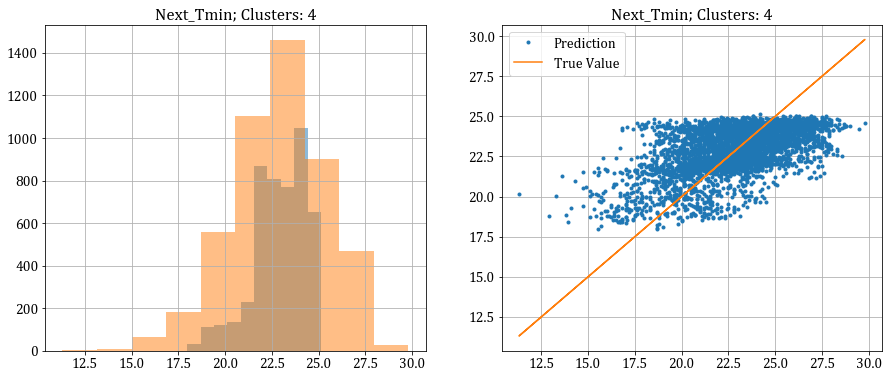

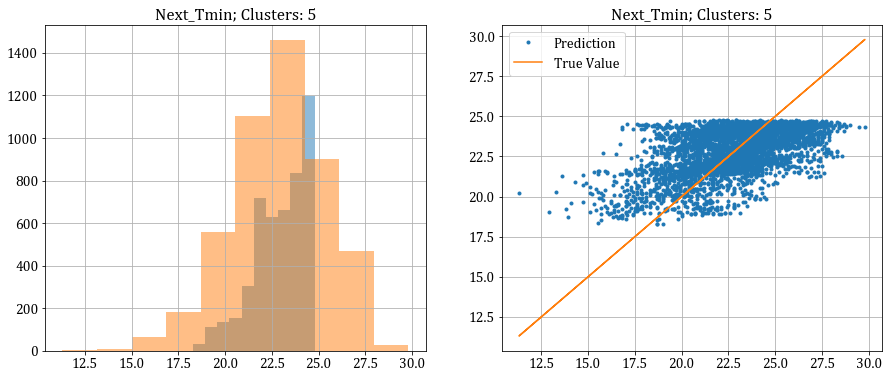

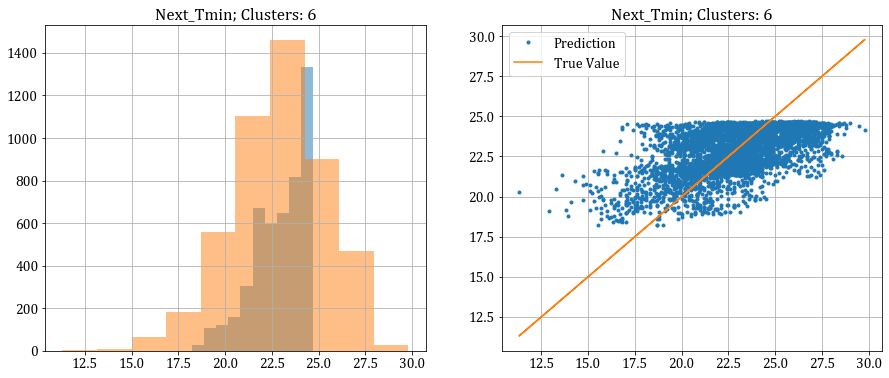

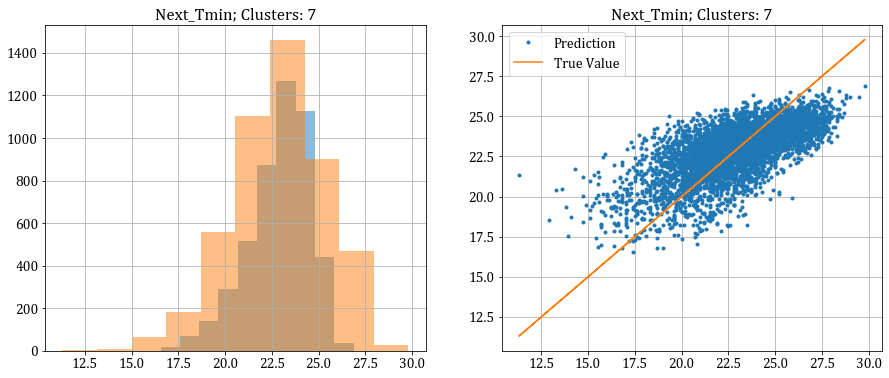

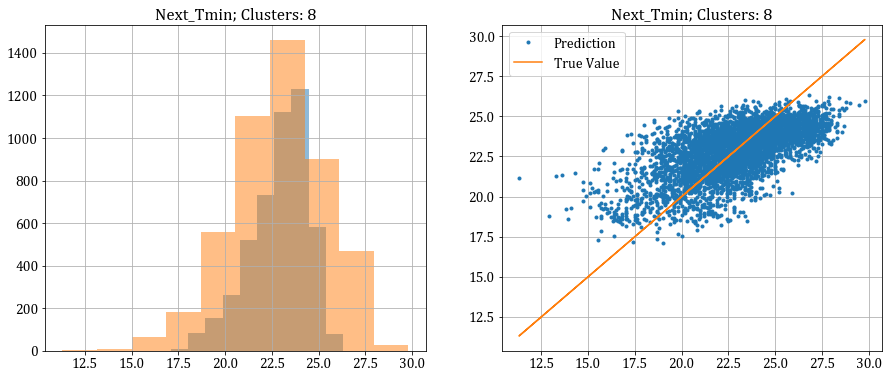

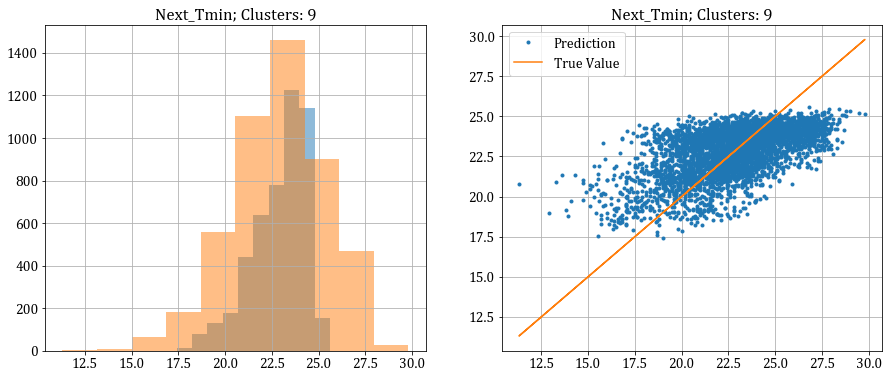

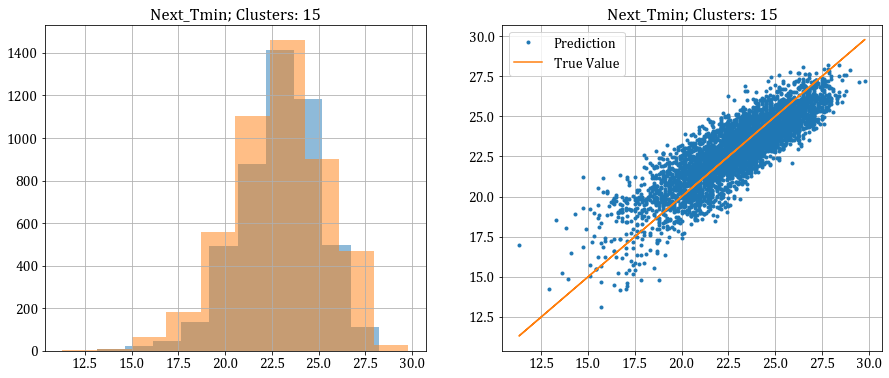

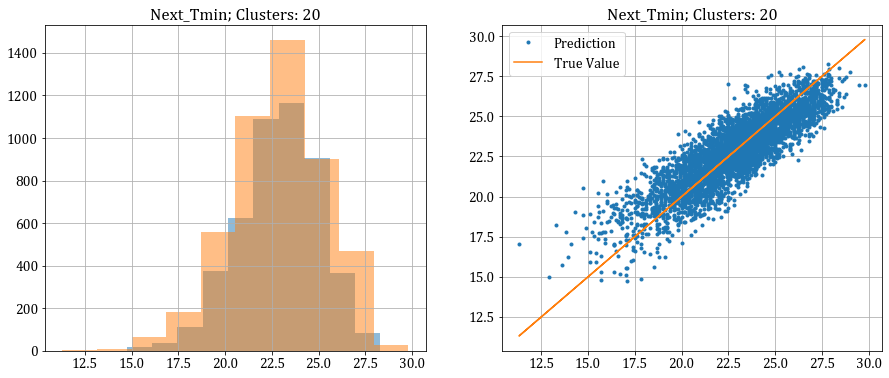

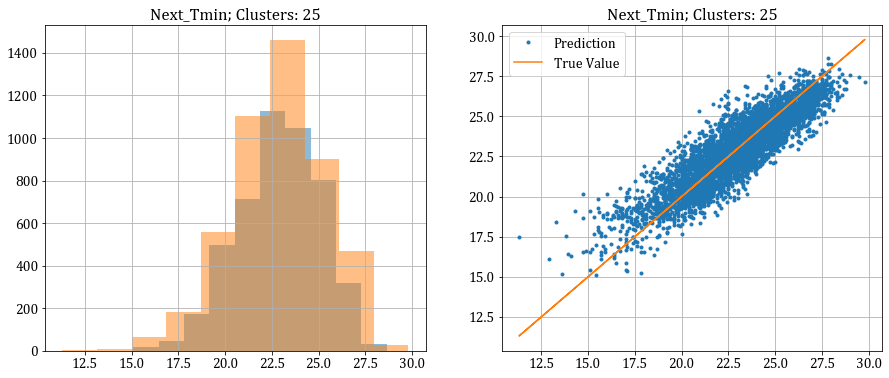

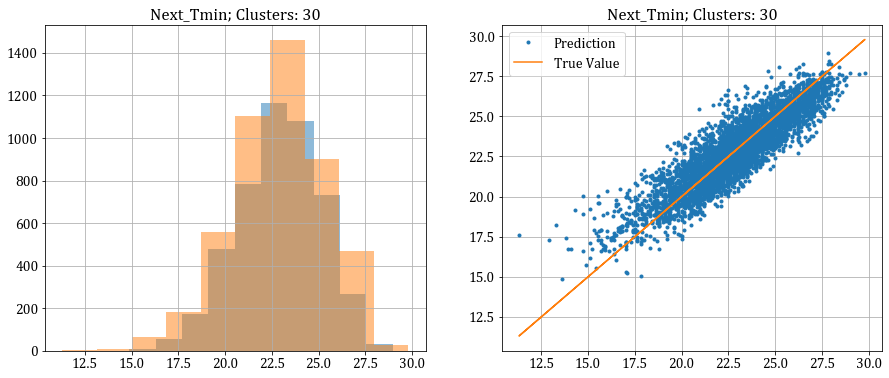

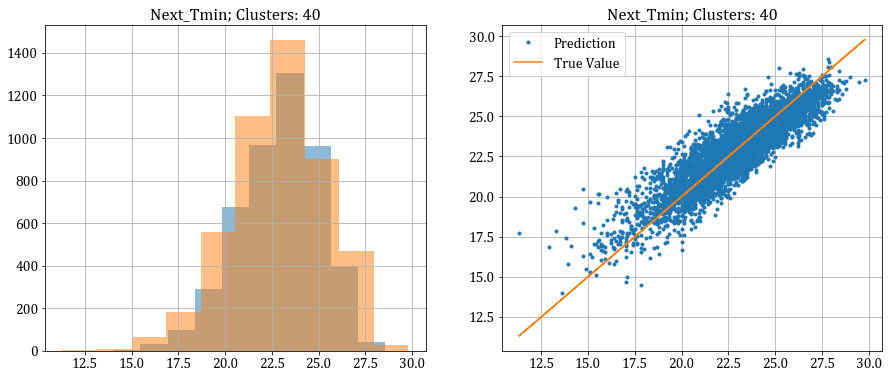

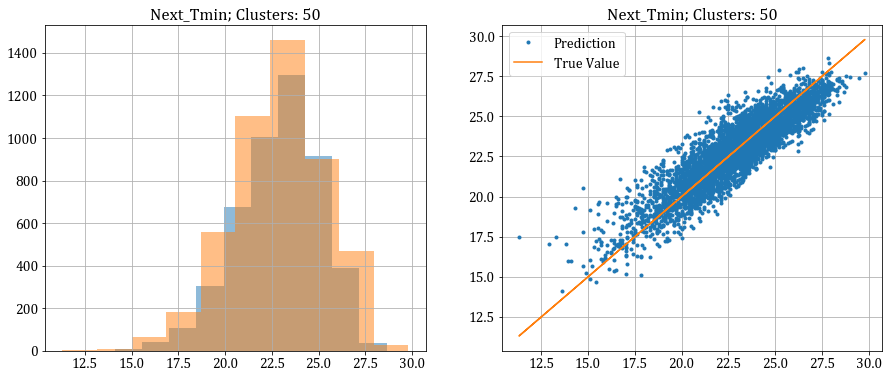

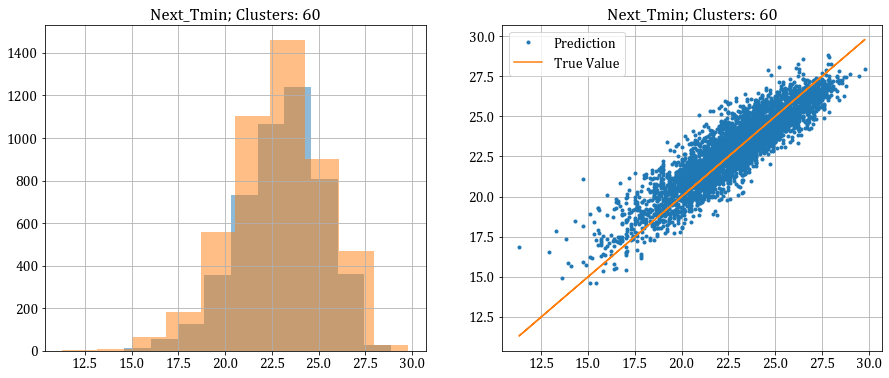

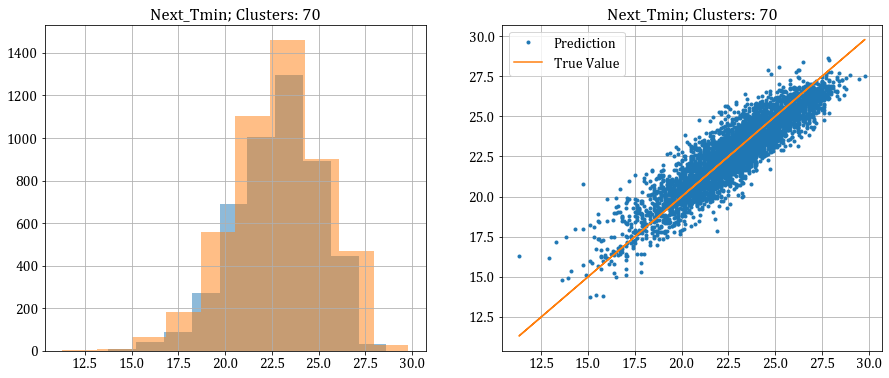

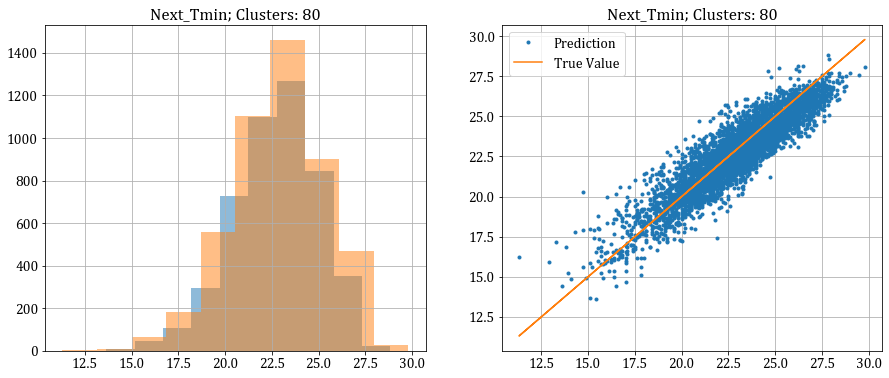

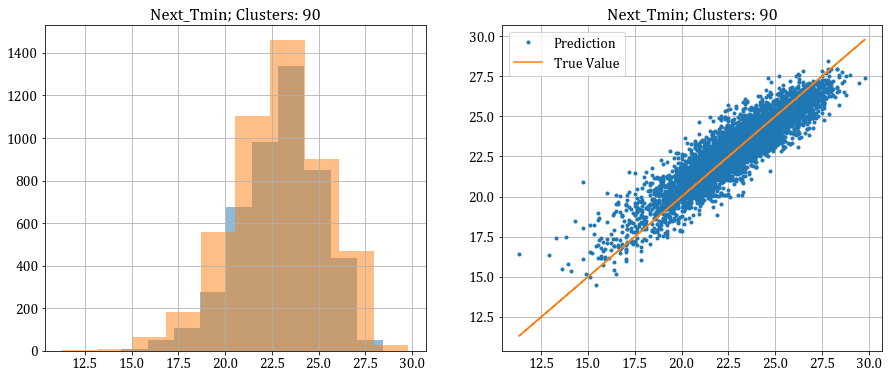

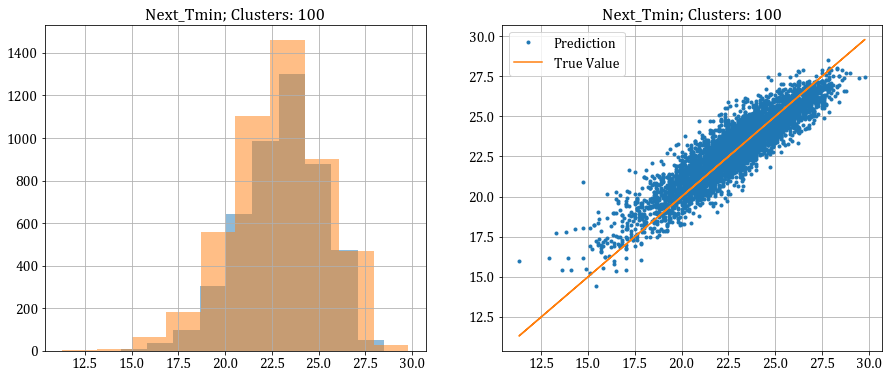

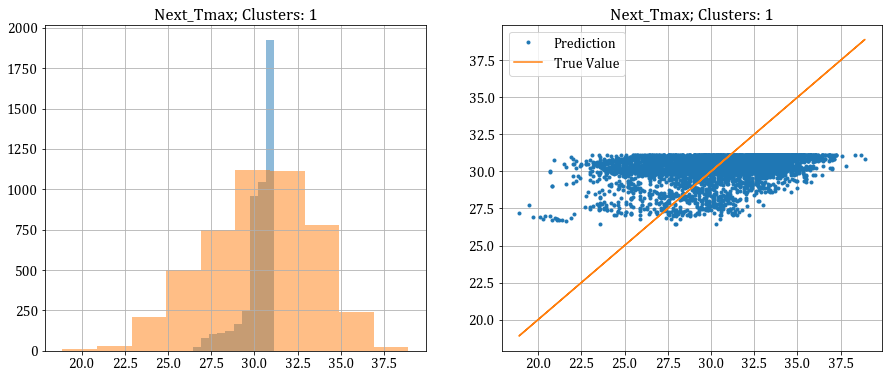

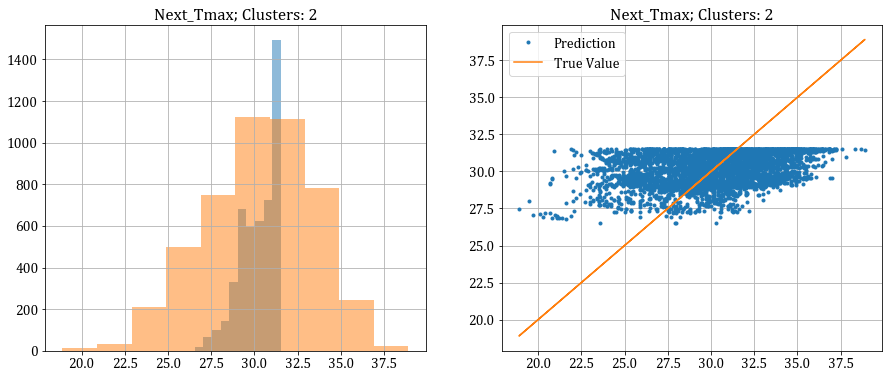

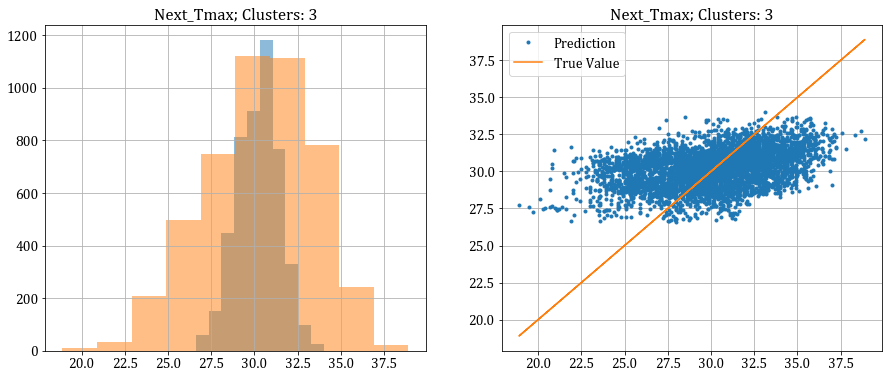

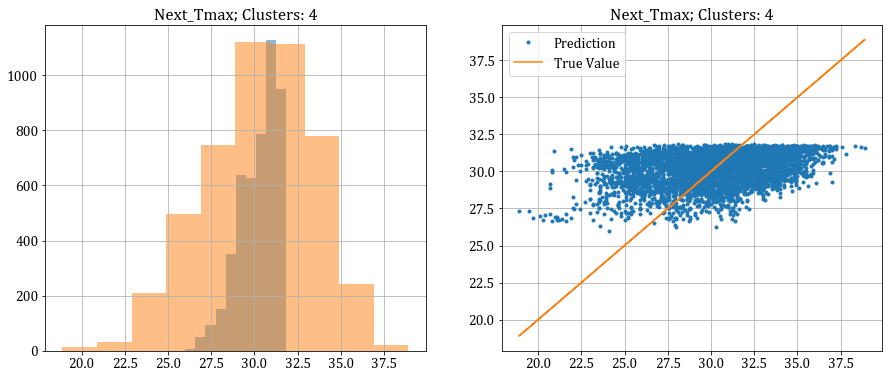

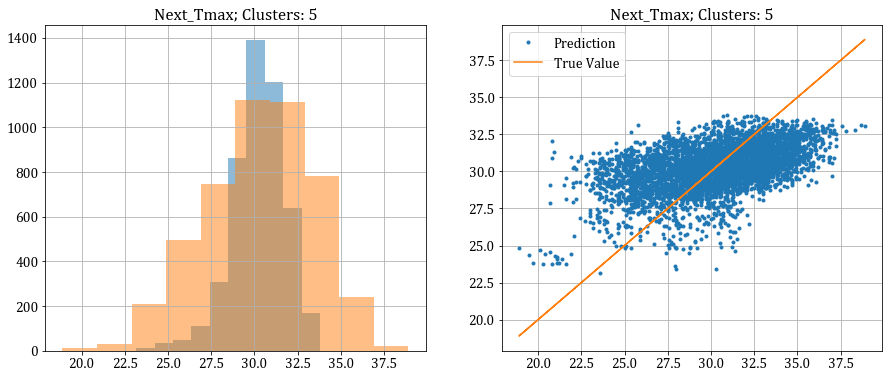

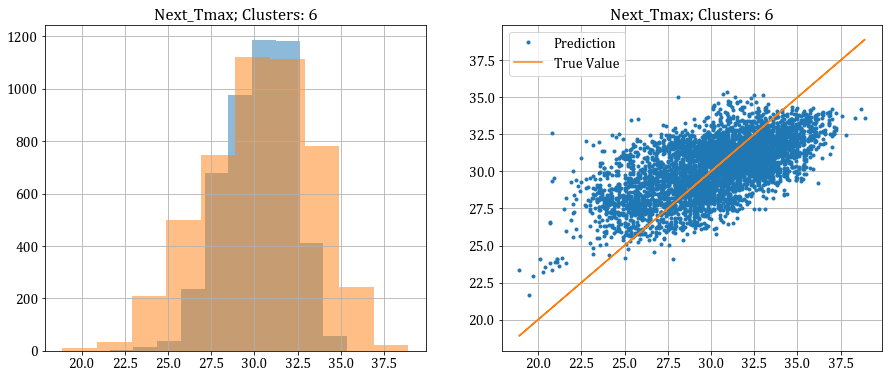

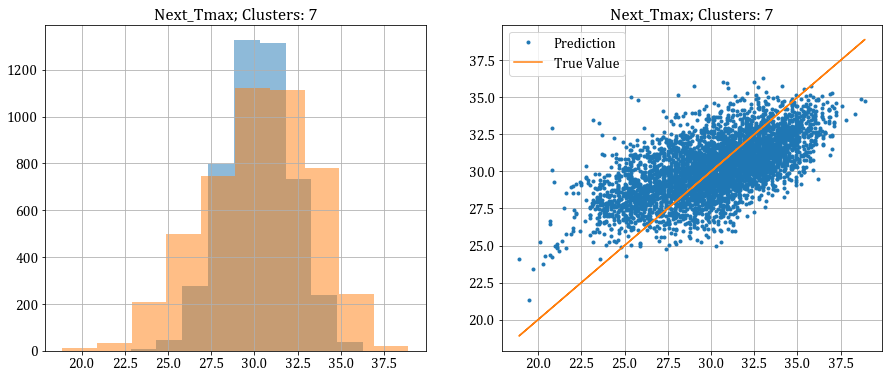

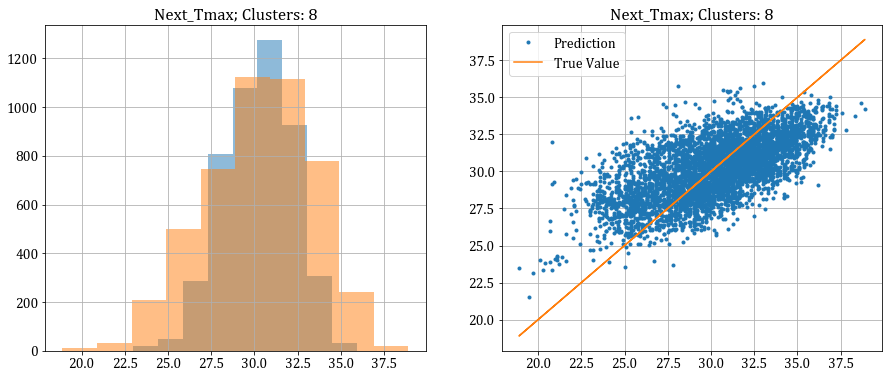

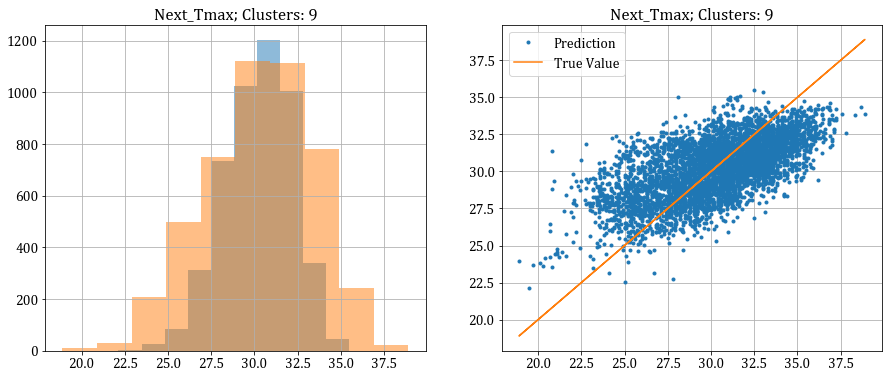

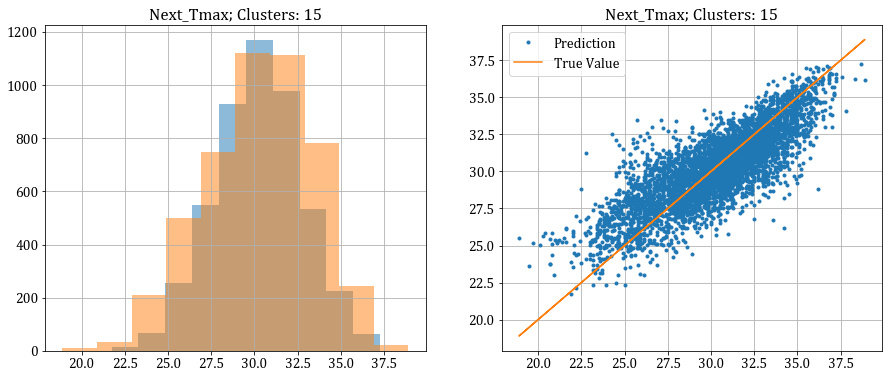

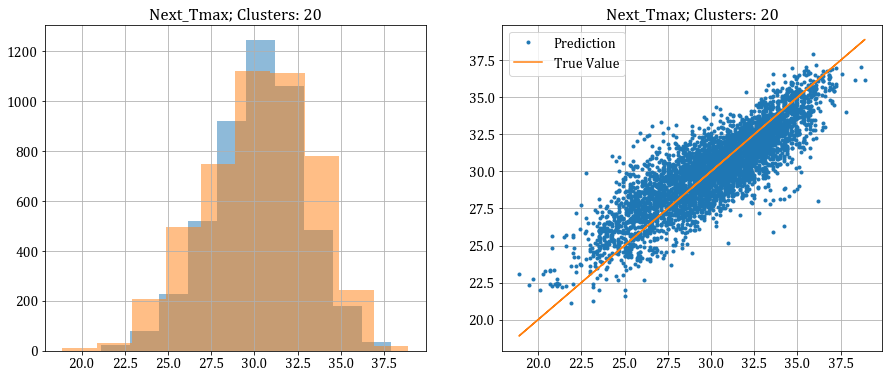

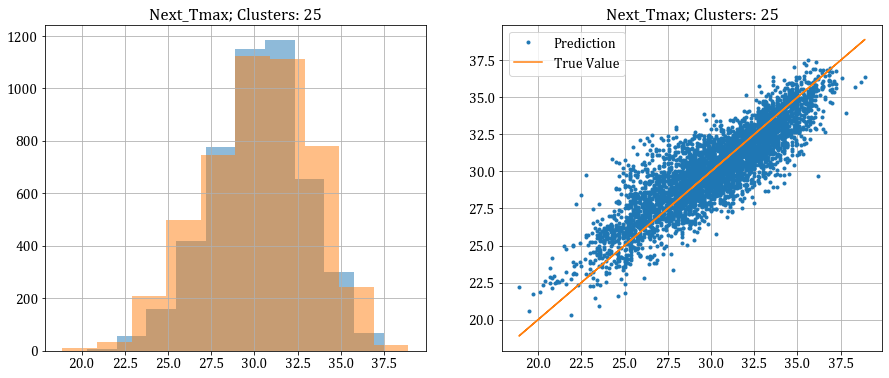

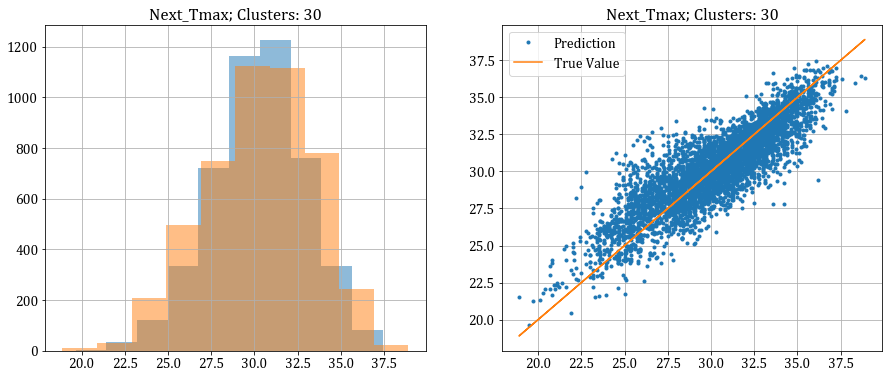

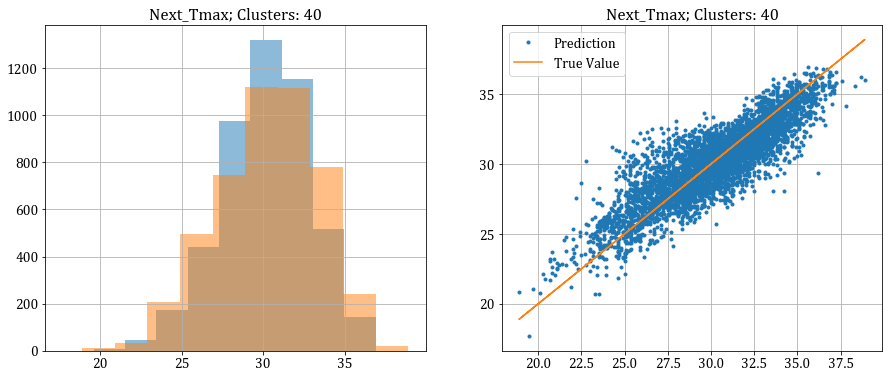

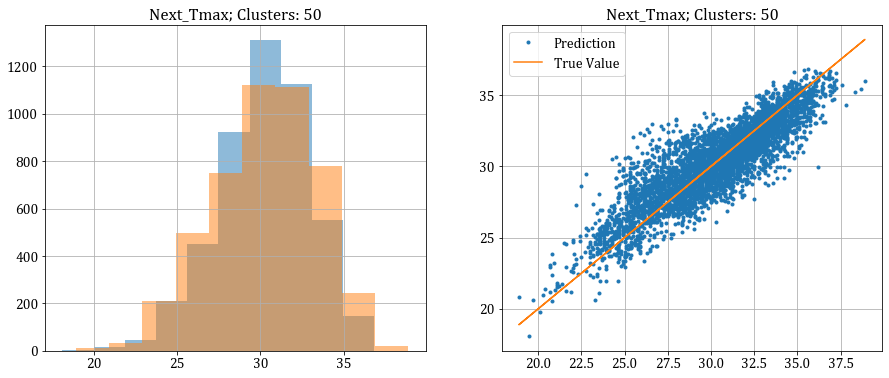

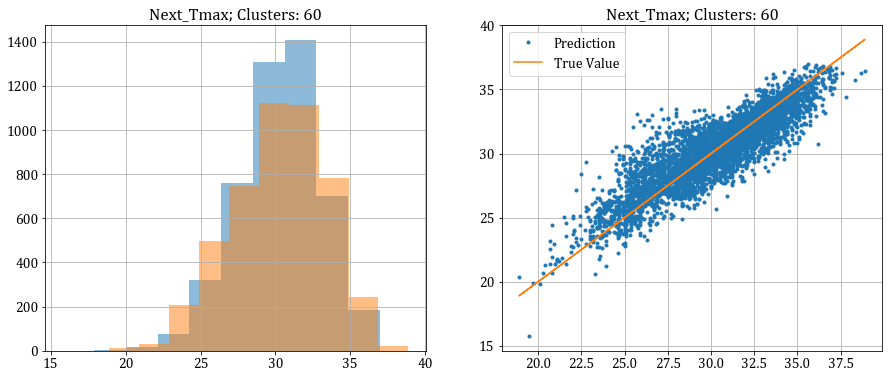

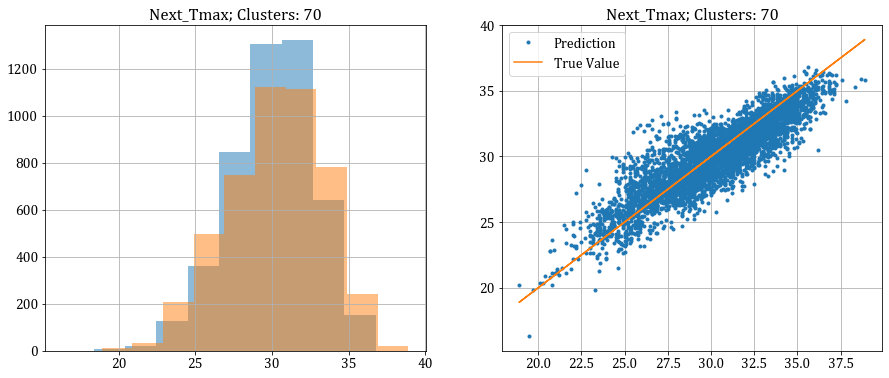

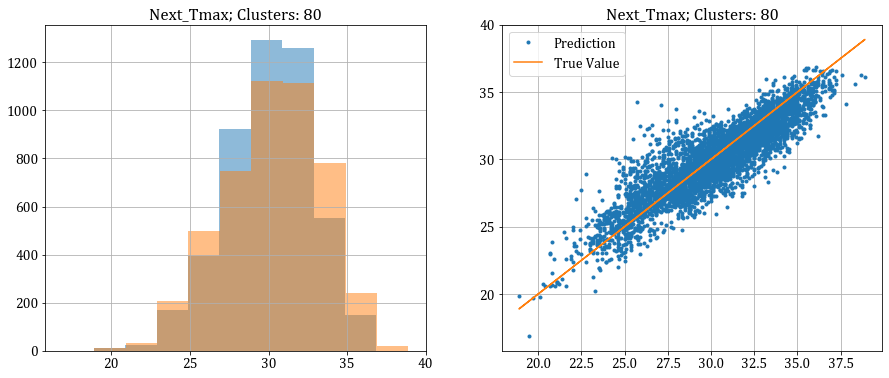

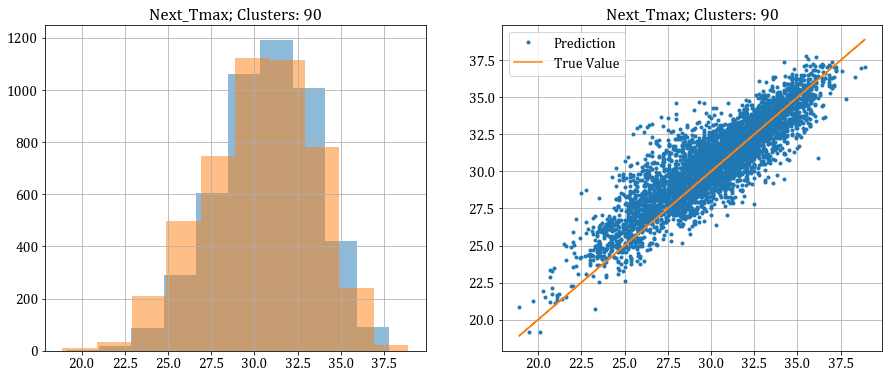

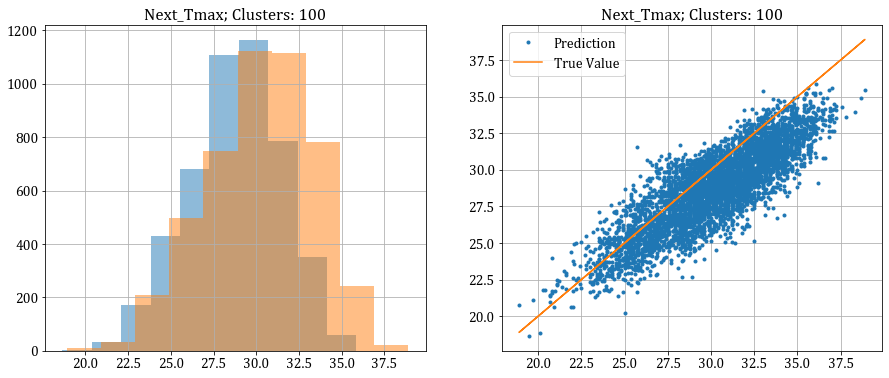

In [3]:
num_clusters = [1]
num_clusters.extend(range(2,10))
num_clusters.extend(range(15, 31, 5))
num_clusters.extend(range(40, 101, 10))

# No regularization
min_sse_list, min_error_list, min_val_error_list, min_kmeans_list, min_label_list, min_cluster_centers_list, min_val_label_list = gaussian_basis_fit(num_clusters, df_new, df_val_save, df_train, df_val, lmbda=0, fit_var="T_min")
max_sse_list, max_error_list, max_val_error_list, max_kmeans_list, max_label_list, max_cluster_centers_list, max_val_label_list = gaussian_basis_fit(num_clusters, df_new, df_val_save, df_train, df_val, lmbda=0, fit_var="T_max")

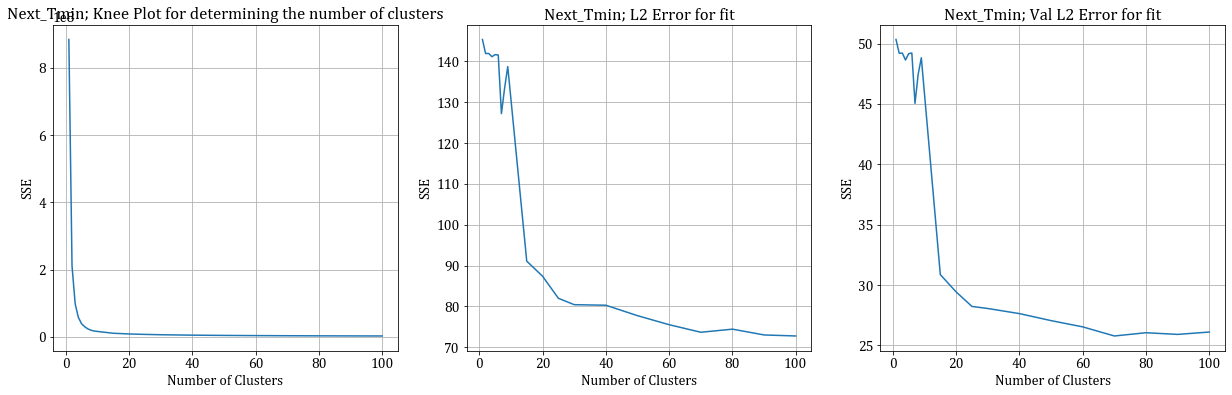

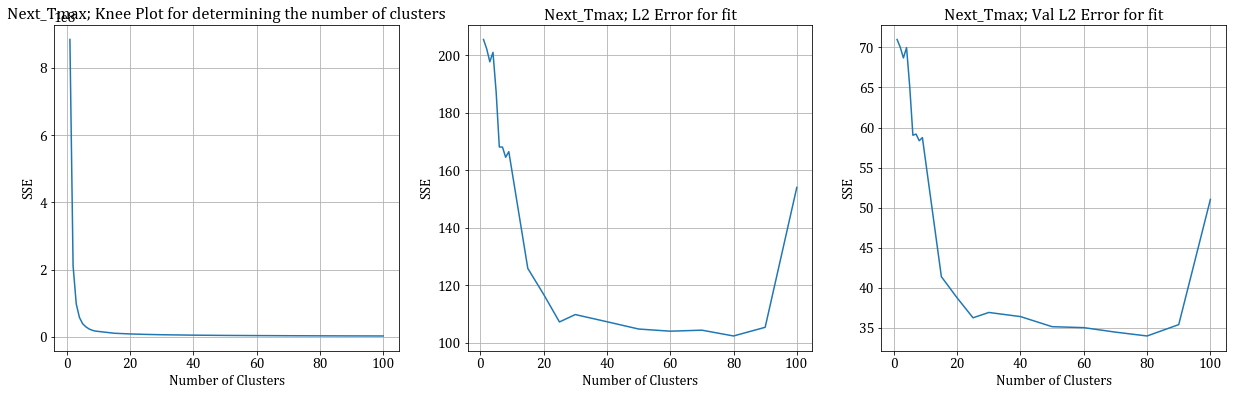

In [4]:
plt.figure(figsize=[21,6])
plt.subplot(1,3,1)
plt.plot(num_clusters, min_sse_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Next_Tmin; Knee Plot for determining the number of clusters")
plt.subplot(1,3,2)
plt.plot(num_clusters, min_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("Next_Tmin; L2 Error for fit"))
plt.subplot(1,3,3)
plt.plot(num_clusters, min_val_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("Next_Tmin; Val L2 Error for fit"))
plt.show()
plt.show()

plt.figure(figsize=[21,6])
plt.subplot(1,3,1)
plt.plot(num_clusters, max_sse_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Next_Tmax; Knee Plot for determining the number of clusters")
plt.subplot(1,3,2)
plt.plot(num_clusters, max_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("Next_Tmax; L2 Error for fit"))
plt.subplot(1,3,3)
plt.plot(num_clusters, max_val_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("Next_Tmax; Val L2 Error for fit"))
plt.show()
plt.show()

In [5]:
min_error_list = np.array(min_error_list)
min_val_error_list = np.array(min_val_error_list)
min_df_error = pd.DataFrame({"Clusters":num_clusters, "Error":min_error_list, "Validation Error":min_val_error_list})
min_df_error.sort_values(by=["Validation Error"], ascending=True, inplace=True)
min_df_error.to_csv("../datasets/t3_d3_no_reg_min.csv")
display(min_df_error)

max_error_list = np.array(max_error_list)
max_val_error_list = np.array(max_val_error_list)
max_df_error = pd.DataFrame({"Clusters":num_clusters, "Error":max_error_list, "Validation Error":max_val_error_list})
max_df_error.sort_values(by=["Validation Error"], ascending=True, inplace=True)
max_df_error.to_csv("../datasets/t3_d3_no_reg_max.csv")
display(max_df_error)

,Clusters,Error,Validation Error
16,70,73.694827,25.777530
18,90,73.036615,25.908031
17,80,74.453323,26.046137
19,100,72.786257,26.103646
15,60,75.544517,26.531295
14,50,77.753748,27.048821
13,40,80.307559,27.629872
12,30,80.444648,28.053154
11,25,82.004758,28.223496
10,20,87.401434,29.425206


,Clusters,Error,Validation Error
17,80,102.286596,33.990577
16,70,104.304566,34.469614
15,60,103.952389,35.031846
14,50,104.706280,35.148817
18,90,105.304117,35.409207
11,25,107.161564,36.260254
13,40,107.243561,36.408637
12,30,109.731942,36.924963
10,20,116.769445,38.733037
9,15,125.785611,41.390254


70.0 (70, 17)


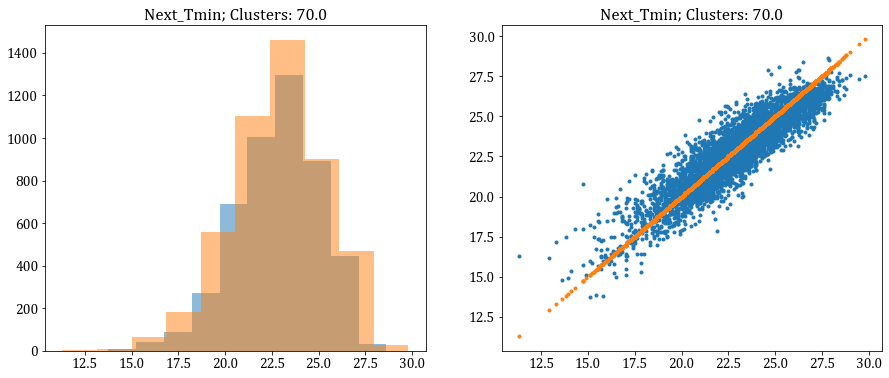

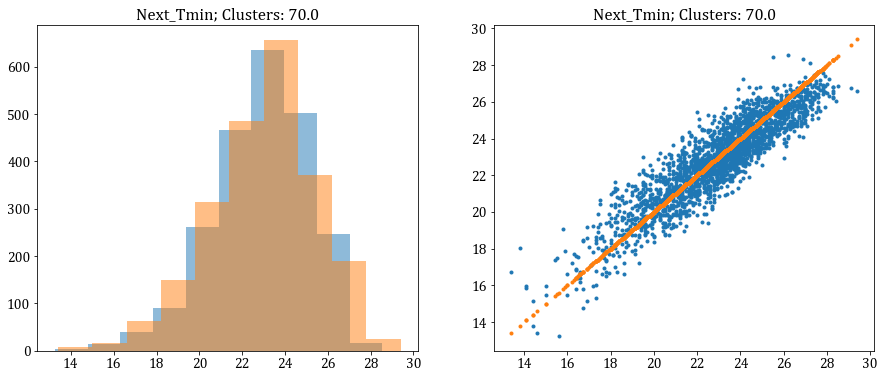

Test SSE: 51.3786915979154


In [6]:
min_best_cluster = min_df_error.iloc[0]["Clusters"]
pos = num_clusters.index(min_best_cluster)
min_best_centers = min_cluster_centers_list[pos]
min_best_centers.shape

print(min_best_cluster, min_best_centers.shape)

kmeans = min_kmeans_list[pos]
min_best_centers = min_cluster_centers_list[pos]
corresponding_center = min_best_centers[min_label_list[pos],:]

X = df_new.to_numpy()
X_val = df_val_save.to_numpy()
X_test = df_test_save.to_numpy()
val_labels = min_val_label_list[pos]
test_labels = kmeans.predict(X_test)

distance = np.linalg.norm(X-corresponding_center, axis=1)
var = np.var(distance)*distance.size

phi = np.ones((X.shape[0], 1))
phi_val = np.ones((X_val.shape[0], 1))
phi_test = np.ones((X_test.shape[0], 1))

for i in range(int(min_best_cluster)):
    A = X-min_best_centers[i,:]
    A = np.exp(-np.linalg.norm(X-min_best_centers[i,:], axis=1)**2/var)

    B = X_val-min_best_centers[i,:]
    B = np.exp(-np.linalg.norm(X_val-min_best_centers[i,:], axis=1)**2/var)
    
    c = X_test-min_best_centers[i,:]
    c = np.exp(-np.linalg.norm(X_test-min_best_centers[i,:], axis=1)**2/var)

    phi = np.append(phi, np.exp(-np.linalg.norm(X-min_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_val = np.append(phi_val, np.exp(-np.linalg.norm(X_val-min_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_test = np.append(phi_test, np.exp(-np.linalg.norm(X_test-min_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)

lmbda = 0
W1 = (np.linalg.inv(phi.T @ phi + lmbda*np.identity(phi.shape[1])) @ phi.T) @ df_train["Next_Tmin"]
W1 = W1.reshape(-1,1)
pred = phi @ W1
val_pred = phi_val @ W1
test_pred = phi_test @ W1

plt.figure(figsize=[15,6])
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.subplot(1, 2, 1)
plt.hist(pred, alpha=0.5)
plt.hist(df_train["Next_Tmin"], alpha=0.5)
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(df_train["Next_Tmin"], pred, ".")
plt.plot(df_train["Next_Tmin"], df_train["Next_Tmin"], '.')
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.grid()
plt.show()

plt.figure(figsize=[15,6])
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.subplot(1, 2, 1)
plt.hist(test_pred, alpha=0.5)
plt.hist(df_test["Next_Tmin"], alpha=0.5)
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(df_test["Next_Tmin"], test_pred, ".")
plt.plot(df_test["Next_Tmin"], df_test["Next_Tmin"], '.')
plt.title("Next_Tmin; Clusters: "+str(min_best_cluster))
plt.grid()
plt.show()

test_error = np.linalg.norm(df_test["Next_Tmin"].to_numpy().reshape(-1,1)-test_pred)
print("Test SSE:", test_error)

80.0 (80, 17)


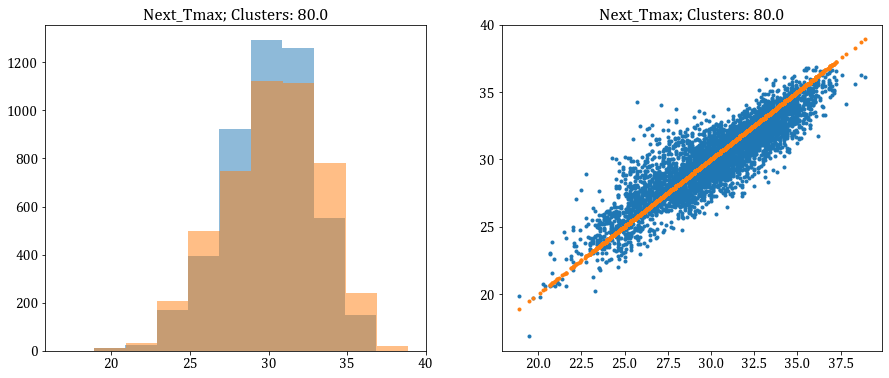

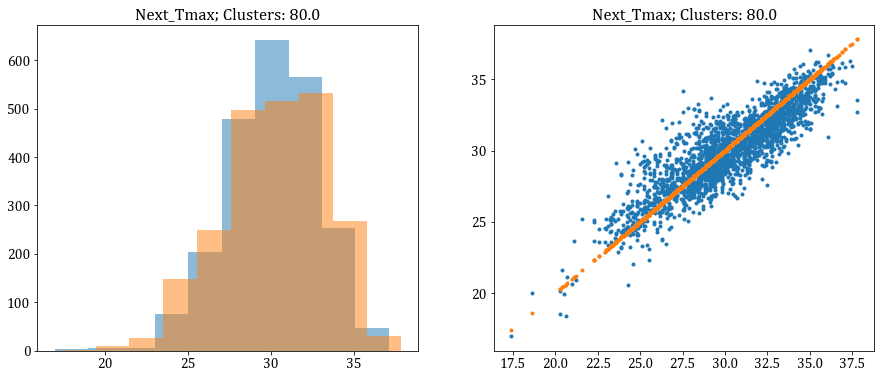

Test SSE: 71.44972768419585


In [7]:
max_best_cluster = max_df_error.iloc[0]["Clusters"]
pos = num_clusters.index(max_best_cluster)
max_best_centers = max_cluster_centers_list[pos]
max_best_centers.shape

print(max_best_cluster, max_best_centers.shape)

kmeans = max_kmeans_list[pos]
max_best_centers = max_cluster_centers_list[pos]
corresponding_center = max_best_centers[max_label_list[pos],:]

X = df_new.to_numpy()
X_val = df_val_save.to_numpy()
X_test = df_test_save.to_numpy()
val_labels = max_val_label_list[pos]
test_labels = kmeans.predict(X_test)

distance = np.linalg.norm(X-corresponding_center, axis=1)
var = np.var(distance)*distance.size

phi = np.ones((X.shape[0], 1))
phi_val = np.ones((X_val.shape[0], 1))
phi_test = np.ones((X_test.shape[0], 1))

for i in range(int(max_best_cluster)):
    A = X-max_best_centers[i,:]
    A = np.exp(-np.linalg.norm(X-max_best_centers[i,:], axis=1)**2/var)

    B = X_val-max_best_centers[i,:]
    B = np.exp(-np.linalg.norm(X_val-max_best_centers[i,:], axis=1)**2/var)
    
    c = X_test-max_best_centers[i,:]
    c = np.exp(-np.linalg.norm(X_test-max_best_centers[i,:], axis=1)**2/var)

    phi = np.append(phi, np.exp(-np.linalg.norm(X-max_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_val = np.append(phi_val, np.exp(-np.linalg.norm(X_val-max_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    phi_test = np.append(phi_test, np.exp(-np.linalg.norm(X_test-max_best_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)

lmbda = 0
W1 = (np.linalg.inv(phi.T @ phi + lmbda*np.identity(phi.shape[1])) @ phi.T) @ df_train["Next_Tmax"]
W1 = W1.reshape(-1,1)
pred = phi @ W1
val_pred = phi_val @ W1
test_pred = phi_test @ W1

plt.figure(figsize=[15,6])
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.subplot(1, 2, 1)
plt.hist(pred, alpha=0.5)
plt.hist(df_train["Next_Tmax"], alpha=0.5)
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(df_train["Next_Tmax"], pred, ".")
plt.plot(df_train["Next_Tmax"], df_train["Next_Tmax"], '.')
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.grid()
plt.show()

plt.figure(figsize=[15,6])
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.subplot(1, 2, 1)
plt.hist(test_pred, alpha=0.5)
plt.hist(df_test["Next_Tmax"], alpha=0.5)
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(df_test["Next_Tmax"], test_pred, ".")
plt.plot(df_test["Next_Tmax"], df_test["Next_Tmax"], '.')
plt.title("Next_Tmax; Clusters: "+str(max_best_cluster))
plt.grid()
plt.show()

test_error = np.linalg.norm(df_test["Next_Tmax"].to_numpy().reshape(-1,1)-test_pred)
print("Test SSE:", test_error)